In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sb

Use the dataset framingham, the data set is used to predict the 10 year risk of coronary heart disease CHD. The following is description of each feature. 

• Sex: male or female(Nominal) <br>
• Age: Age of the patient; <br>
Behavioral<br>
• Current Smoker: whether or not the patient is a current smoker <br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.<br>
Medical( history)<br>
• BP Meds: whether or not the patient was on blood pressure medication <br>
• Prevalent Stroke: whether or not the patient had previously had a stroke <br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>
• Diabetes: whether or not the patient had diabetes <br>
Medical(current)<br>
• Tot Chol: total cholesterol level <br>
• Sys BP: systolic blood pressure <br>
• Dia BP: diastolic blood pressure <br>
• BMI: Body Mass Index <br>
• Heart Rate: heart rate <br>
• Glucose: glucose level <br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)<br>

In [3]:
HD_df = pd.read_csv(filepath_or_buffer='framingham.csv')
HD_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


1. Identify what are the data types of each column. (10)

Write your answer here <br>
• Sex: (Nominal) <br>
• Age: (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) <br>
• Education: Ordinal <br>
Behavioral<br>
• Current Smoker: (Nominal)<br>
• Cigs Per Day: (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>
Medical( history)<br>
• BP Meds: (Nominal)<br>
• Prevalent Stroke: (Nominal)<br>
• Prevalent Hyp: (Nominal)<br>
• Diabetes: (Nominal)<br>
Medical(current)<br>
• Tot Chol: (Continuous)<br>
• Sys BP: (Continuous)<br>
• Dia BP: (Continuous)<br>
• BMI: (Continuous)<br>
• Heart Rate: (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
• Glucose: (Continuous)<br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)<br>

2. Create a correlation heatmap of the data (10)

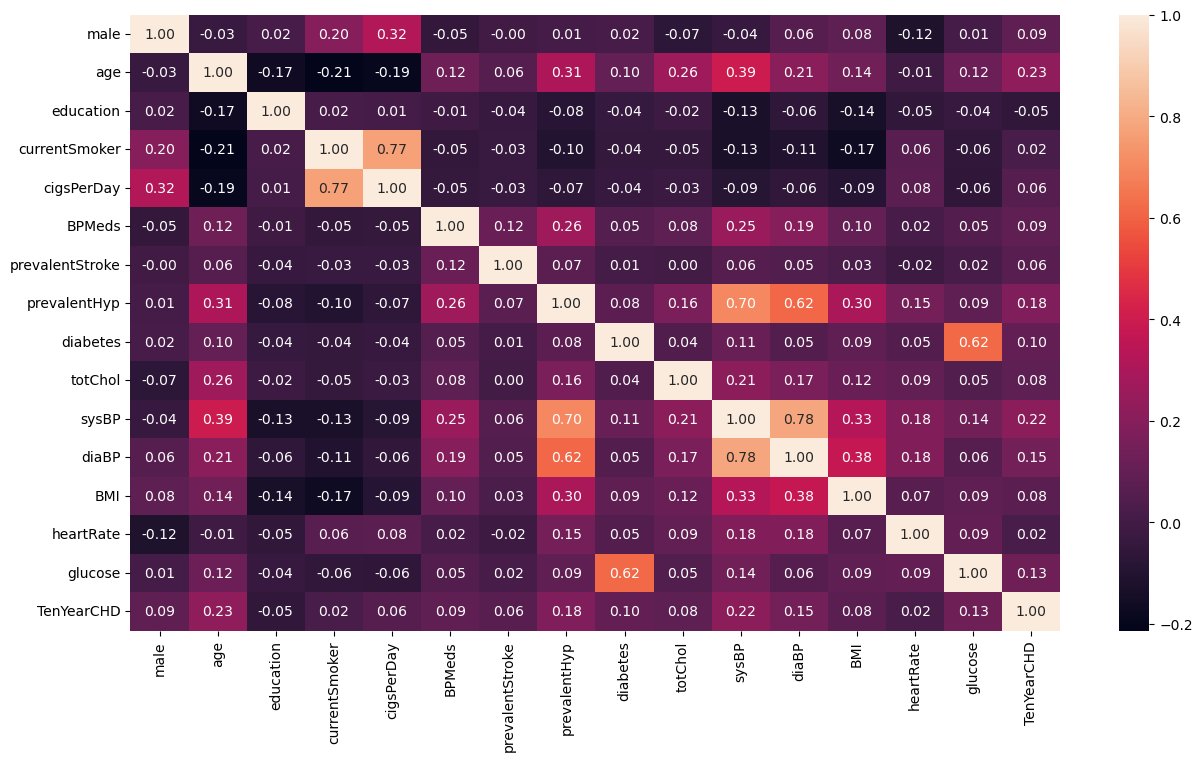

In [4]:
plt.figure(figsize=(15, 8))
sb.heatmap(HD_df.corr(), annot=True, fmt='.2f')

plt.show()

3. According to the heatmap, do you think some of the feature should not be count in the logistic regression? Which ones? (10)

Features that are highly correlated with other features (other than the target) should not be counted since both attributes would resember a similar pattern. These features are:
- prevalentHyp is highly correlated with sysBP, in this instance I'll choose to not count sysBP
- dialBP and sysBP are correlted, but I have chosen to not count sysBP earlier so dialBP can be counted for the model
- currentSmoker and cigsPerDay are highly correlated, I'll choose to not count currentSmoker  

Thus the features to no count in logistic regression are: sysBP and currentSmoker

4. How many empty values are there in each risk factor?(10)

In [5]:
# HD_df.info()
HD_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

5. Show how you will handle these null values for each risk factor? Why? (10)

The features with missing values are: education, BPMeds, cigsPerDay, totChol, heartRate, and glucose.  

`education` is ordinal, with values from 1 to 4 representing the education level, to fill in the missing values we can introduce another class '0' preceeding all other values in this ordinal type. This '0' class would mean 'none' or 'no education' allowing it to be used in model calculations.  

`BPMeds` is to represent whether the patient takes medications or not, in the dataset the vast majority of BPMeds is coded as 0 (the patient does not take meds), thus it could be assumed that a missing value for this feature indicates the patient does not take the medication.  

A quick look at the dataset will show that for every instance where `cigsPerDay` is null, the `currentSmoker` is filled in as 1, meaning that the patient does smoke, this implies that they must smoke some amount of ciggarettes per day. To fill in the missing values of this feature with something meaning, it can be imputed to be filled in with the mean (non-null) `cigsPerDay` values.  

The final features with missing data are `totChol`, `BMI`, and `glucose`. It would not make sense to fill these with zeros, as any average person would have some value for cholesterol, body mass index, and glucose thus we impute these features with the mean of all the non-null values in that column.

6. Handle these null values. (10)

In [22]:
from sklearn.impute import SimpleImputer

# Creating new 0.0 (none) class for missing education values
# Fill in missing BPMeds with 0s
HD_df.fillna(value={'education': 0.0, 'BPMeds': 0}, inplace=True)

# Impute missing values in cigsPerDay, totChol, heartRate, glucose with mean
featuresToImpute = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for feature in featuresToImpute:
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(HD_df[[feature]])
    HD_df[feature] = imputer.transform(HD_df[[feature]])

HD_df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


7. Show the histogram of each factors(10)

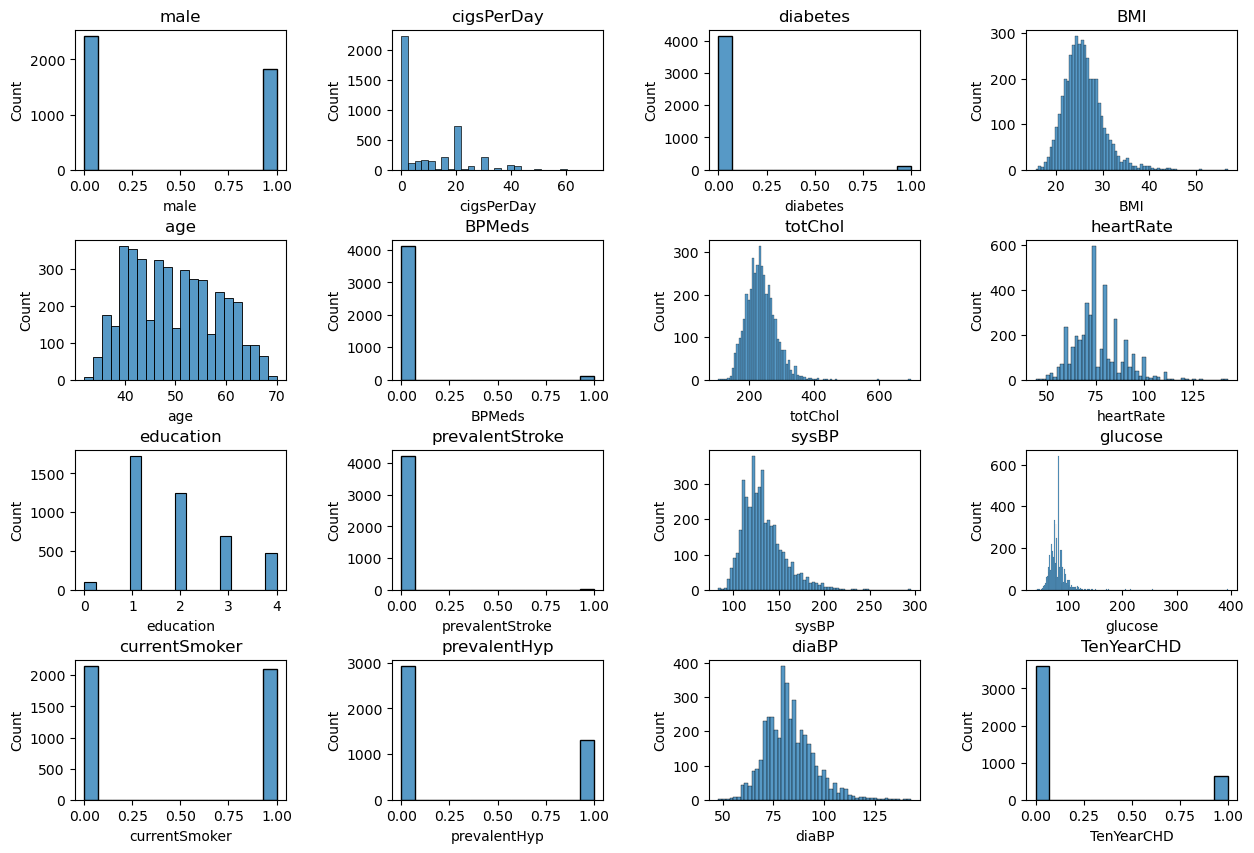

In [38]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

i, j = 0, 0
for feature in HD_df.columns:
    if i == 4:
        j += 1
        i = 0

    # if feature == 'TenYearCHD': break

    sb.histplot(data=HD_df, x=feature, ax=axes[i][j])
    axes[i][j].set_title(feature)

    i += 1

plt.show()

8. Split the data set into X_train, X_test, y_train, y_test. (10)

In [39]:
from sklearn.model_selection import train_test_split

X = HD_df.drop(['TenYearCHD'], axis=1)
y = HD_df['TenYearCHD']

# 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

9. Train the value and show the predict result of first 10 data points. (10)

In [67]:
from sklearn.linear_model import LogisticRegression

CHD_logRegr = LogisticRegression(max_iter=1700)
CHD_logRegr.fit(X_train, y_train)

predictions = CHD_logRegr.predict(X_test)

print("first 10 predictions:", predictions[0:10])

first 10 predictions: [0 0 0 0 0 0 0 0 0 0]


10. Evaluate the model.(10) (You can use any score or method to evaluate the model, but you need to explain detail about your result)

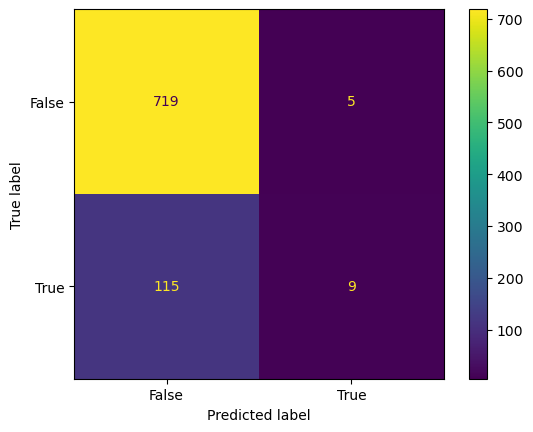

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=[False, True])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()

**Analysis**  
By examining the confusion matrix, we can analyze the precision, which measures the accuracy of positive predictions, and the recall, which assesses the model's ability to detect all positive instances in the dataset, allowing us to evaluate the logistic regression model.

According to the confusion matrix the model predicted 9 true positives, and 719 true negatives meaning it has an accuracy of 
$\large\frac{719+9}{719+115+5+9}=\normalsize 0.858490566\approx85.85\%$. This means that the model was correctly able to predict roughy 85% of the output in the testing dataset.  

The precision of the model is 
$\large\frac{9}{115+9}\approx\normalsize 0.07258\approx 7.26\%$. This means that the model predictions for positive 10 year risk of coronary heart disease is correct 7.26% of the time.  

The recall is $\large\frac{9}{9+5}\approx\normalsize 0.64286\approx 64.29\%$, this indicates that out of all the relevant instances, the model correctly identifies approximately 64.29% of them.  

The model overall has a high accuracy however this is because it is very good at predicting patients *without* a 10 year risk of coronary heart disease. Its precision is low suggesting that the model still struggles to correctly predict patients who do have a risk of CHD. The recall indicates that the model captures a reasonable portion of the actual positive cases but still misses a significant portion of them.